In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [42]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


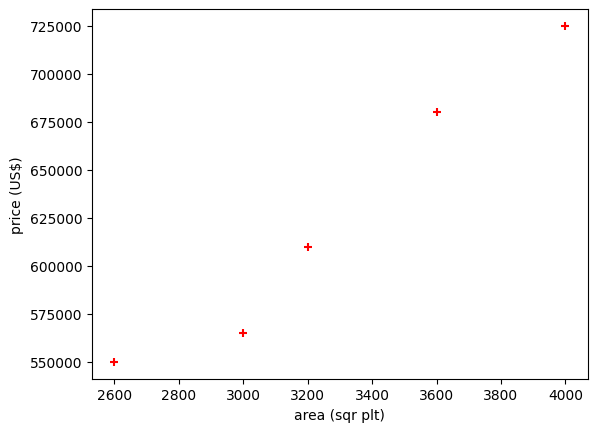

In [43]:
%matplotlib inline
plt.xlabel('area (sqr plt)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price, color = 'red', marker = '+')

In [44]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]], df[["price"]])

LinearRegression()

In [45]:
prediction = reg.predict(pd.DataFrame({'area': [3300]}))
print(prediction)

[[628715.75342466]]


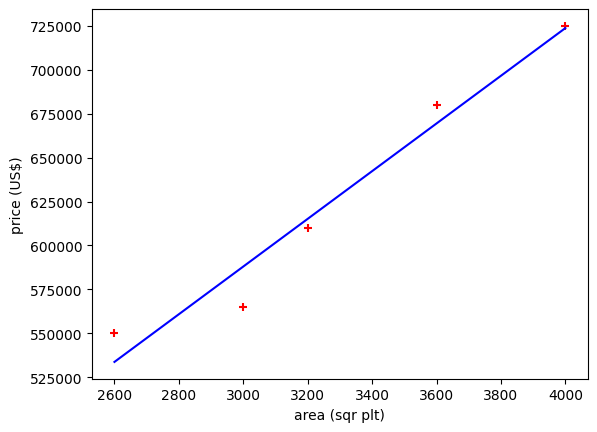

In [46]:
%matplotlib inline
plt.xlabel('area (sqr plt)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price, color = 'red', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'blue')

In [47]:
reg.coef_ # y = m*x + b => m

array([[135.78767123]])

In [48]:
reg.intercept_ # y = m*x + b => b

array([180616.43835616])

In [49]:
prediction = reg.predict(pd.DataFrame({"area" : [5000]}))
print(prediction)

[[859554.79452055]]


In [50]:
d = pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [51]:
p = reg.predict(d)

In [52]:
d["price"] = p

In [53]:
d.to_csv("prediction.csv")

Exercise

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [55]:
df = pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


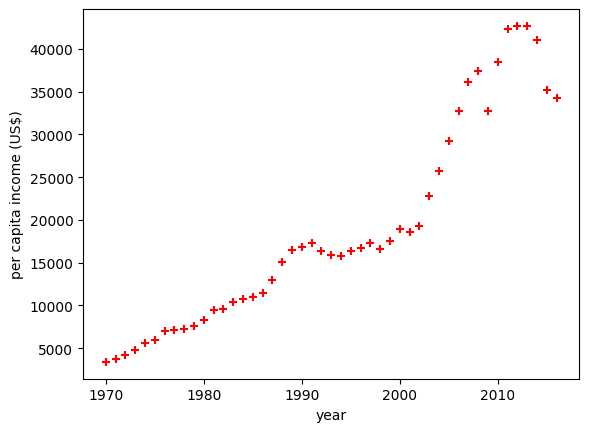

In [59]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df["year"],df["per capita income (US$)"], color = "red", marker = "+")

In [62]:
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df[["per capita income (US$)"]])


LinearRegression()

In [63]:
prediction = reg.predict(pd.DataFrame({"year" : [2020]}))
print(prediction)

[[41288.69409442]]


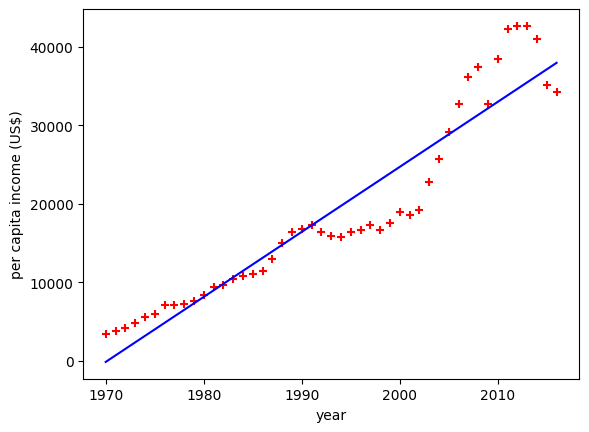

In [65]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df["year"],df["per capita income (US$)"], color = "red", marker = "+")
plt.plot(df["year"], reg.predict(df[["year"]]), color = "blue")

Multi variable linear regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices (1).csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
bedroom_median = df.bedrooms.median()
bedroom_median

4.0

In [14]:
df.bedrooms = df.bedrooms.fillna(bedroom_median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[["area", "bedrooms", "age"]], df[["price"]])

LinearRegression()

In [16]:
reg.coef_

array([[  112.06244194, 23388.88007794, -3231.71790863]])

In [17]:
reg.intercept_

array([221323.0018654])

In [21]:
reg.predict([[3000,3,40]])


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[498408.25158031]])